## Demo Notebook

This notebook demonstrates how to train the model and run the optimization. It mostly runs code present in `main.py` and `optimize_dijkstra.py`. Note that this is using toy stress data exclusively, generated according to the following equations:

$$
\text{Manner1}(a, b, c) : \left( 
    \frac{a \left( \frac{a - b \cdot 100}{a + 1} \right)}{10}
    - c
    + 3 \sin(a)
    + \varepsilon
    + 2 \sin\left(\frac{a}{10}\right)
    + 3 \sin\left(\frac{a}{50}\right)
    + 0.8 \sin\left(\frac{a}{100}\right)
\right) \cdot \lambda
$$

$$
\text{Manner2}(a, b, c) : \left( 
    \frac{c \cdot a \left( \frac{a - b \cdot 100}{a + 1} \right)}{25}
    - c
    + 2 \sin\left(\frac{a}{5}\right)
    + 1.5 \varepsilon
\right) \cdot \lambda
$$

where $a$ is the turbine speed, $b$ the GVO, $c$ the Head. $\lambda$ is a scale term which scales the stress to magnitudes ~5 MPa.

In [1]:
!git lfs pull # ensures that all relevant data is present

In [2]:
from config import CONFIG
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint

In [3]:
callbacks=[
    EarlyStopping(monitor="loss/validation", mode="min", check_finite=True, patience=1000),
    ModelCheckpoint(monitor="loss/validation", filename='model-{epoch}', auto_insert_metric_name=False)
]

# run for less time there's no need to train for very long for the toy data
CONFIG["trainer_config"]["max_epochs"] = 100

trainer = pl.Trainer(logger=True, **CONFIG["trainer_config"], callbacks=callbacks)
datamodule = CONFIG["data_module"](**CONFIG["data_module_kwargs"])

print(isinstance(datamodule, pl.LightningDataModule))

model = CONFIG["model"](**CONFIG["model_kwargs"])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


processing files...
True


In [4]:
trainer.fit(model=model, datamodule=datamodule)
model.eval()

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type   | Params | Mode 
-----------------------------------------------
0 | amp_model   | ResDNN | 1.1 M  | train
1 | phase_model | ResDNN | 1.1 M  | train
2 | mean_model  | ResDNN | 17.0 K | train
-----------------------------------------------
2.3 M     Trainable params
0         Non-trainable params
2.3 M     Total params
9.135     Total estimated model params size (MB)
29        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=13` in the `DataLoader` to improve performance.
/home/jovyan/work/hydropower-fatigue-damage-reduction/src/models.py:53: UserWarning: A window was not provided. A rectangular window will be applied.Please provide the same window used by stft to make the inversion lossless.To suppress this warning and use a rectangular window, explicitly set `window=torch.ones(n_fft, device=<device>)`. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:1023.)
  x = torch.real(torch.istft(f, n_fft=self.window_size, hop_length=self.hop_length, center=False))
/opt/conda/lib/python3.10/site-packages/torch/functional.py:704: UserWarning: A window was not provided. A rectangular window will be applied,which is known to cause spectral leakage. Other 

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


iTFDNN(
  (amp_model): ResDNN(
    (linear_in): Linear(in_features=6144, out_features=128, bias=True)
    (relu): ReLU()
    (linear_out): Linear(in_features=128, out_features=2048, bias=True)
    (hidden): ModuleList(
      (0-5): 6 x Linear(in_features=128, out_features=128, bias=True)
    )
  )
  (phase_model): ResDNN(
    (linear_in): Linear(in_features=6144, out_features=128, bias=True)
    (relu): ReLU()
    (linear_out): Linear(in_features=128, out_features=2048, bias=True)
    (hidden): ModuleList(
      (0-3): 4 x Linear(in_features=128, out_features=128, bias=True)
    )
  )
  (mean_model): ResDNN(
    (linear_in): Linear(in_features=3, out_features=64, bias=True)
    (relu): ReLU()
    (linear_out): Linear(in_features=64, out_features=2, bias=True)
    (hidden): ModuleList(
      (0-3): 4 x Linear(in_features=64, out_features=64, bias=True)
    )
  )
)

The model has finished training, let's check how its predictions look on an example of the train and validation set.

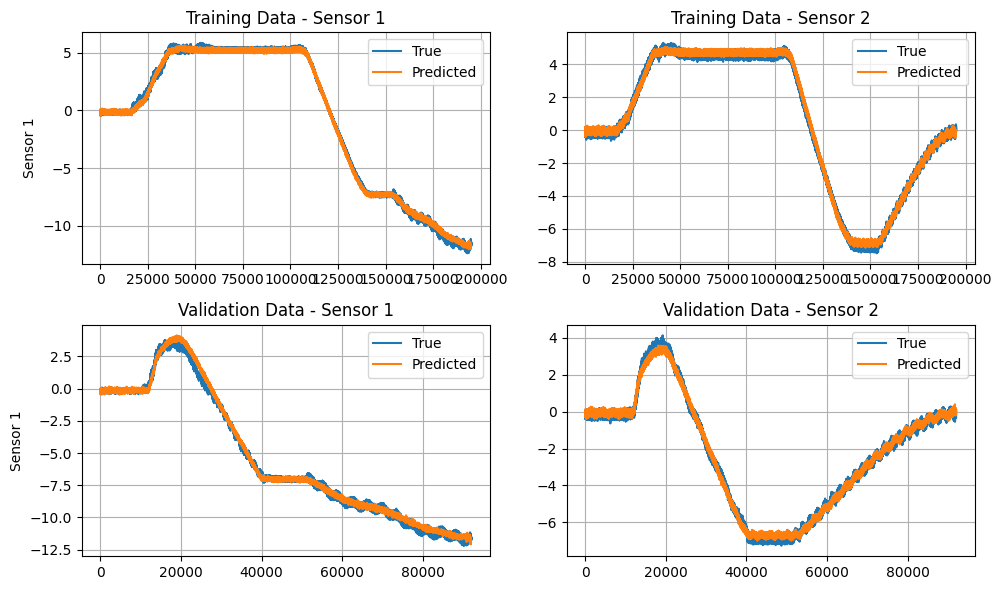

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X_train, y_train = datamodule.train_dset[0]
y_train_pred = model(X_train.unsqueeze(0)).detach().squeeze(0)


X_val, y_val = datamodule.val_dset[0]
y_val_pred = model(X_val.unsqueeze(0)).detach().squeeze(0)

# Unscale the variance:
stress_std = np.expand_dims(np.sqrt(datamodule.var.values[-2:]), 0)

y_train, y_train_pred, y_val, y_val_pred = (
    y_train * stress_std,
    y_train_pred * stress_std,
    y_val * stress_std,
    y_val_pred * stress_std,
)

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].plot(y_train.cpu().numpy()[:, 0], label='True')
axs[0, 0].plot(y_train_pred.cpu().numpy()[:, 0], label='Predicted')
axs[0, 0].grid(True)
axs[0, 0].legend(loc='best')
axs[0, 0].set_ylabel('Sensor 1')
axs[0, 0].set_title('Training Data - Sensor 1')

axs[0, 1].plot(y_train.cpu().numpy()[:, 1], label='True')
axs[0, 1].plot(y_train_pred.cpu().numpy()[:, 1], label='Predicted')
axs[0, 1].grid(True)
axs[0, 1].legend(loc='best')
axs[0, 1].set_title('Training Data - Sensor 2')

axs[1, 0].plot(y_val.cpu().numpy()[:, 0], label='True')
axs[1, 0].plot(y_val_pred.cpu().numpy()[:, 0], label='Predicted')
axs[1, 0].grid(True)
axs[1, 0].legend(loc='best')
axs[1, 0].set_ylabel('Sensor 1')
axs[1, 0].set_title('Validation Data - Sensor 1')

axs[1, 1].plot(y_val.cpu().numpy()[:, 1], label='True')
axs[1, 1].plot(y_val_pred.cpu().numpy()[:, 1], label='Predicted')
axs[1, 1].grid(True)
axs[1, 1].legend(loc='best')
axs[1, 1].set_title('Validation Data - Sensor 2')

plt.tight_layout()

We can now use this model to run the optimization process. We will run a significantly coarsend version of the original to ensure that things finish quickly.

In [6]:
import torch
from optimize_dijkstra import DijkstraStartupOptimizer, start, end
from optimize_dijkstra import var as ctrl_var


optimizer = DijkstraStartupOptimizer(
    start,
    end,
    stress_model=model,
    grid_size=32,
    interpol_length=None,
    diagonal_neighbors=True,
    mode='damage',
    allow_decrease=False,
    max_hop_distance=(2, 6),
    forbidden_region=True
)

res = optimizer.optimize(interactive=False)

/home/jovyan/work/hydropower-fatigue-damage-reduction/optimize_dijkstra.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  stress_model.load_state_dict(torch.load(artifact

Continuing from Checkpoint...


/home/jovyan/work/hydropower-fatigue-damage-reduction/optimize_dijkstra.py:164: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  head = end[-1] * torch.ones(u.shape[:-1] + (1,))


In [7]:
parent, cost, final_trajectory, final_stress = res


Finally, let's visualize the trajectory.

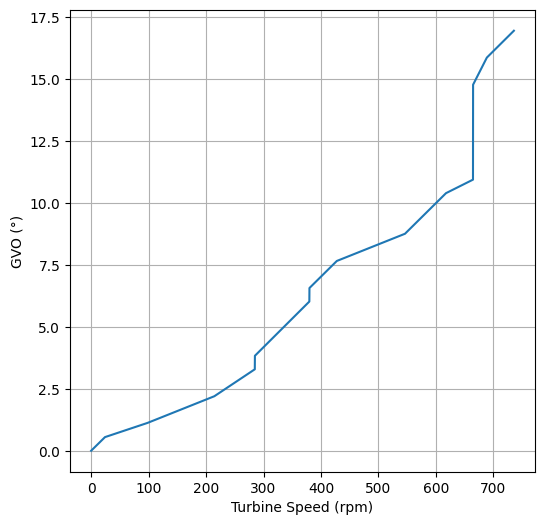

In [8]:
ctrl_std = np.sqrt(ctrl_var.values)

fig, axs = plt.subplots(1, 1, figsize=(6,6))
axs.plot(final_trajectory[0, :, 0] * ctrl_std[0], final_trajectory[0, :, 1] * ctrl_std[1])
axs.set_xlabel('Turbine Speed (rpm)')
axs.set_ylabel('GVO (°)')
axs.grid(True)